# Бобочков Дмитрий 382006-1.

## 0. Описание задачи

In [1]:
import pandas as pd            
import matplotlib.pyplot as plt 
import seaborn as sns           
import numpy as np              

Датасет содержит в себе физико-химические данные о красных и белых португальских винах `"Vinho Verde"`. В качестве выходных данных выступают оценки экспертов, которые попробовали вина и поставили свои оценки от 0 до 10 (`quality`).

Помимо цвета (красное/белое) для описания физикохимических характеристик предоставлено ещё 11 значений:
1.  `fixed acidity` (винная кислота)
2.  `volatile acidity` (уксусная кислота)
3.  `citric acid` (лимонная кислота)
4.  `residual sugar` (остаточный сахар)
5.  `chlorides` (хлорид натрия)
6.  `free sulfur dioxide` (свободный диоксид серы)
7.  `total sulfur dioxide` (общий диоксид серы)
8.  `density` (плотность)
9.  `pH` (кислотность)
10. `sulfates` (сульфат калия)
11. `alcohol` (процентное содержание спирта)


- Целью данной лабораторной работы является анализ представленных данных, а также обучение модели, которая сможет предсказывать итоговое качество вина по его физико-химическим характеристикам.

## 1. Загрузка данных и обработка выбросов


Данные загружены с сайта: https://www.kaggle.com/datasets/shelvigarg/wine-quality-dataset. 

Данные хранятся в `csv` (Comma separated values) формате.

Загрузим данные и убедимся в их корректности.

In [2]:
path = "winequalityN.csv"
data_raw=pd.read_csv(path)
data_raw

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


- Перед тем, как визуализировать данные избавимся от выбросов, чтобы не отвелкаться на них и, при рассмотрении данных, делать корректные выводы.

Посмотрим на выбросы:

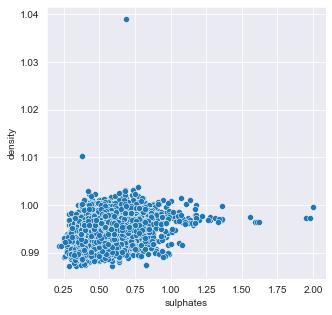

In [3]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.scatterplot(x=data_raw['sulphates'],y=data_raw['density'])
pass

Можно заметить, что небольшое количество выбросов присутствует.

Избавимся от них. Для этого отсеем данные, которые находятся в `0.5`-ом процентиле и те, которые находятся в процентиле выше `99.5`-го.

In [4]:
quantiles = data_raw.quantile([0.005, 0.995])
quantiles

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.005,4.943,0.115,0.00,0.8,0.01847,3.0,9.0,0.98862,2.86,0.2800,8.6,4.0
0.995,12.700,0.965,0.74,19.4,0.24206,86.0,247.0,1.00140,3.70,1.1254,13.6,8.0


In [5]:
outliers = data_raw[
    (data_raw['fixed acidity'] < quantiles.at[0.005, 'fixed acidity']) | (data_raw['fixed acidity'] > quantiles.at[0.995, 'fixed acidity']) |
    (data_raw['volatile acidity'] < quantiles.at[0.005, 'volatile acidity']) | (data_raw['volatile acidity'] > quantiles.at[0.995, 'volatile acidity']) |
    (data_raw['citric acid'] < quantiles.at[0.005, 'citric acid']) | (data_raw['citric acid'] > quantiles.at[0.995, 'citric acid']) |
    (data_raw['residual sugar'] < quantiles.at[0.005, 'residual sugar']) | (data_raw['residual sugar'] > quantiles.at[0.995, 'residual sugar']) |
    (data_raw['chlorides'] < quantiles.at[0.005, 'chlorides']) | (data_raw['chlorides'] > quantiles.at[0.995, 'chlorides']) |
    (data_raw['free sulfur dioxide'] < quantiles.at[0.005, 'free sulfur dioxide']) | (data_raw['free sulfur dioxide'] > quantiles.at[0.995, 'free sulfur dioxide']) |
    (data_raw['total sulfur dioxide'] < quantiles.at[0.005, 'total sulfur dioxide']) | (data_raw['total sulfur dioxide'] > quantiles.at[0.995, 'total sulfur dioxide']) |
    (data_raw['density'] < quantiles.at[0.005, 'density']) | (data_raw['density'] > quantiles.at[0.995, 'density']) |
    (data_raw['pH'] < quantiles.at[0.005, 'pH']) | (data_raw['pH'] > quantiles.at[0.995, 'pH']) |
    (data_raw['sulphates'] < quantiles.at[0.005, 'sulphates']) | (data_raw['sulphates'] > quantiles.at[0.995, 'sulphates']) |
    (data_raw['alcohol'] < quantiles.at[0.005, 'alcohol']) | (
        data_raw['alcohol'] > quantiles.at[0.995, 'alcohol'])
]


Отбрасываем выбросы:

In [6]:
data_without_out= data_raw.drop(outliers.index)

Теперь можно сравнить, как стали выглядить данные после убирания выбросов, с тем как они выглядели до этого:

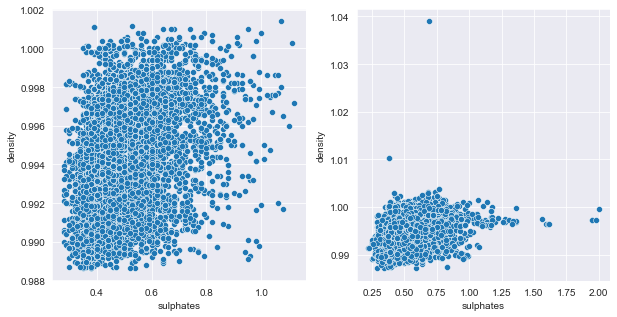

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=data_without_out['sulphates'],y=data_without_out['density'])

plt.subplot(1,2,2)
sns.scatterplot(x=data_raw['sulphates'],y=data_raw['density'])

pass

Т.к. выбросов теперь нет, то можно приступить к визуализации данных.

# 2. Визуализация данных

Для начала посмотрим на вид данных в начале и в конце таблицы.

In [8]:
data_without_out.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [9]:
data_without_out.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Посмотрим на общие характеристики данных, а именно на средние значения, минимальные, максимальные, стандартное отклонения и квартили.

In [10]:
data_without_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6000.000000,6003.000000,6007.000000,6008.000000,6008.000000,6010.000000,6010.000000,6010.000000,6001.000000,6006.000000,6010.000000,6010.000000
mean,7.193642,0.335757,0.315597,5.419724,0.054350,30.356572,116.067304,0.994671,3.218882,0.526980,10.467870,5.822463
std,1.185265,0.155858,0.137633,4.590567,0.025698,16.554108,55.073220,0.002835,0.152830,0.132887,1.152919,0.857996
min,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988620,2.860000,0.280000,8.600000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.250000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,12.700000,0.965000,0.740000,19.400000,0.241000,86.000000,247.000000,1.001400,3.700000,1.120000,13.600000,9.000000


- Посмотрим на распределение классов.

In [11]:
data_without_out['quality'].describe()

count    6010.000000
mean        5.822463
std         0.857996
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

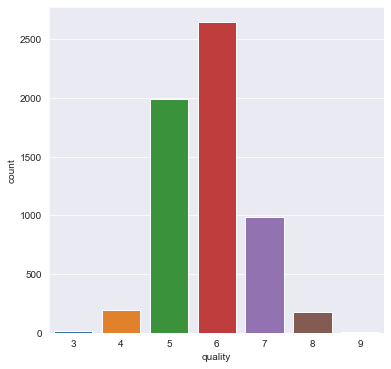

In [12]:
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
sns.countplot(x=data_without_out['quality'])
pass


Можно заметить несбалансированность классов. В датасете преобладают вина среднего качества. Вина с оценками ниже 3 ,а также с оценкой 10 - отсутсвуют. 

- Проанализируем единственный категориальный признак датасета - тип вина (белое/красное).

In [13]:
data_without_out['type'].describe()

count      6010
unique        2
top       white
freq       4576
Name: type, dtype: object

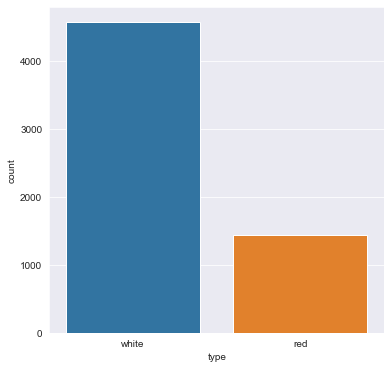

In [14]:
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
sns.countplot(x=data_without_out['type'])
pass

Из графиков видно, что количество белых вин значительно больше.

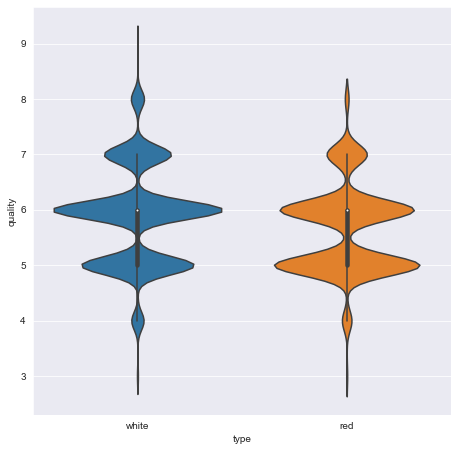

In [15]:
plt.figure(figsize=(7.5,7.5))
sns.violinplot(x="type", y="quality", data=data_without_out)
pass

Если посмотреть на распределение оценок внутри вин, то можно заметить существенные различия. Белые вина чаще получают высокие оценки(7,8,9), чем красные, которые в свою очередь, расположились более равномерно на оценках 5 и 6. Вполне возможно, что тип вина влияет на итоговую оценку.

- Теперь посмотрим на все параметры сразу. Для этого, выведем на экран корреляционную матрицу и посмотрим на выявленые зависимости. 

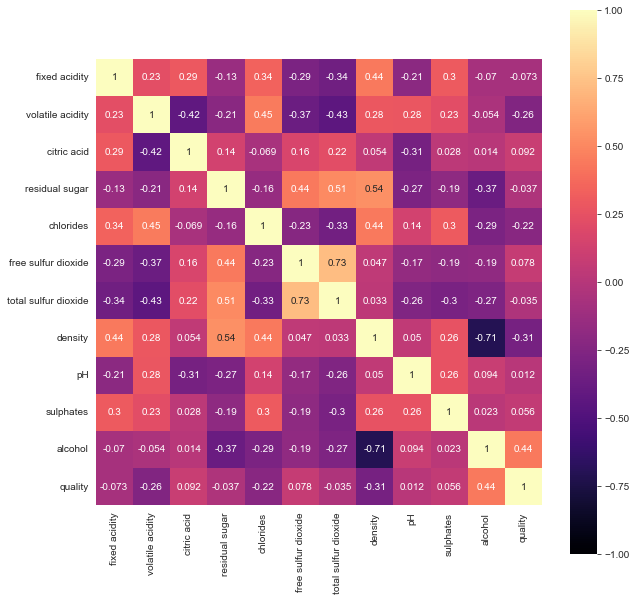

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data_without_out.corr(), vmin = -1, vmax = 1, square=True, annot=True, cmap='magma')
pass

Можно заметить, что некоторые признаки друг с другом почти не связаны, например: `density` и `free sulfur dioxide` или `alcohol` и `sulphates`.

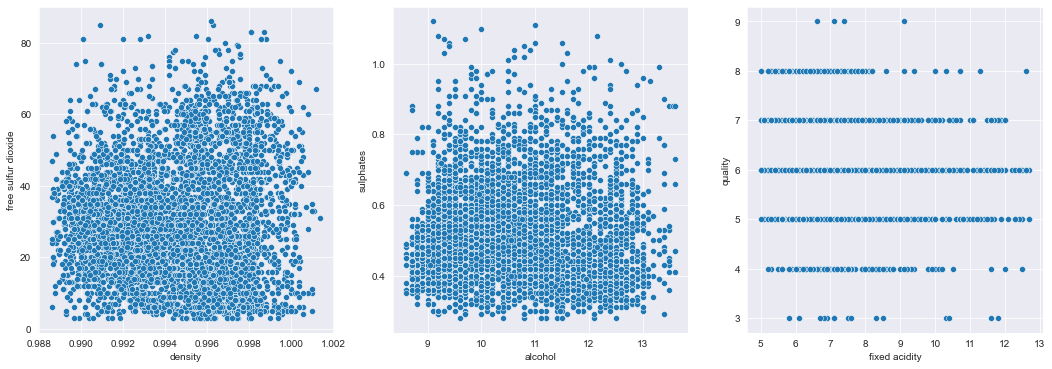

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.scatterplot(x=data_without_out['density'],y=data_without_out['free sulfur dioxide'])

plt.subplot(1,3,2)
sns.scatterplot(x=data_without_out['alcohol'],y=data_without_out['sulphates'])

plt.subplot(1,3,3)
sns.scatterplot(x=data_without_out['fixed acidity'],y=data_without_out['quality'])

pass

Из графиков видно, что зависимости почти нет. Одноко, в датасете присутствует несколько сильно коррелированных признаков, а именно `alcohol` и `density` (`-0.71`, т.е. чем больше алкоголя, тем меньше плотность), `free sulfur dioxide` и `total sulfur dioxide` (`0.73`), а также `density` и `residual sugar` (`0.54`).

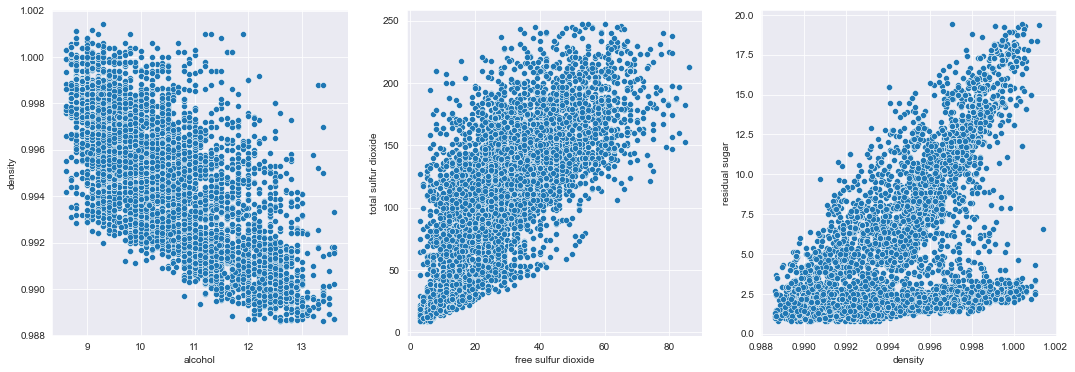

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.scatterplot(x=data_without_out['alcohol'],y=data_without_out['density'])

plt.subplot(1,3,2)
sns.scatterplot(x=data_without_out['free sulfur dioxide'],y=data_without_out['total sulfur dioxide'])

plt.subplot(1,3,3)
sns.scatterplot(x=data_without_out['density'],y=data_without_out['residual sugar'])

pass

Интересно посмотреть, от чего сильнее всего зависит качество вина. Из матрицы корреляции видно, что качество вина сильнее всего зависит от `alcohol`(`-0.31`) и `density`(`0.44`). Однако, значения не сильно велики, а потому одних лишь этих характеристик не достаточно, для того, чтобы предугадать правильную оценку.

# 3. Обработка пропущенных значений


Посмотрим, содержит ли датасет пропущенные значения.

In [19]:
data_without_out.isna().sum()

type                     0
fixed acidity           10
volatile acidity         7
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Видим, что хоть их и не много, но они всё таки присутствуют. Попробуем избавиться от них.

Для этого, заполним пропущенные значения медианами.

In [20]:
data_without_out.fillna(data_without_out.median(axis = 0, numeric_only = True), axis=0 , inplace=True)
data_without_NaN=data_without_out.copy()

In [21]:
data_without_NaN.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Теперь пропущенных значений нет, а значит можно переходить к дальнейшей обработке данных.

# 4. Обработка категариальных признаков


- В датасете есть категориальный признак `'type'` (тип вина), который представлен в виде типа данных `'object'`.

In [22]:
data_without_NaN['type'].dtype

dtype('O')

Для того, чтобы с категориальным признаком было удобно работать заменим его на тип `'category'`.

In [23]:
data_without_NaN['type'] = data_without_NaN['type'].astype('category')
data_without_NaN['type'].dtype


CategoricalDtype(categories=['red', 'white'], ordered=False)

- `'type'` Принимает два значения : `'red'` и `'white'`. Поэтому заменим его на числовой, тогда  `'white'` перейдёт в `0`, а `'red'` в `1`.

In [24]:
data = data_without_NaN.replace({'type': {'red': 1, 'white': 0}})
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 5. Нормализация

Т.к. некоторые методы машинного обученя чувствительны к разбросу данных, проведём нормализацию.

Для этого, сначала разделим данные на те, которы мы хотим нормализовать и те, которые хотим оставить нетронутыми(`'type'`, `'quality'`).

In [25]:
data_numerical=data.drop(['type', 'quality'],axis=1)
data_cat=data[['type','quality']]
data_numerical

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [26]:
data_cat

,type,quality
1,0,6
2,0,6
3,0,6
4,0,6
5,0,6
...,...,...
6492,1,5
6493,1,6
6494,1,6
6495,1,5


Теперь произведём стандартизацию.

In [27]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.010000e+03,6.010000e+03,6010.000000,6010.000000,6.010000e+03,6.010000e+03,6010.000000,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03
mean,3.215767e-16,2.648279e-16,0.000000,0.000000,5.674884e-17,5.674884e-17,0.000000,3.846625e-14,-2.080791e-15,-2.648279e-16,4.350744e-16
std,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.851990e+00,-1.416809e+00,-2.293590,-1.006297,-1.375715e+00,-1.652555e+00,-1.944090,-2.134025e+00,-2.349917e+00,-1.859093e+00,-1.620122e+00
25%,-6.698611e-01,-6.785659e-01,-0.476707,-0.788433,-6.362317e-01,-8.068434e-01,-0.668516,-8.079460e-01,-7.128851e-01,-7.299447e-01,-8.394948e-01
50%,-1.632346e-01,-2.933958e-01,-0.040655,-0.526996,-2.859501e-01,-8.194778e-02,0.053251,8.080936e-02,-5.807241e-02,-1.277322e-01,-1.456040e-01
75%,3.433919e-01,4.127494e-01,0.540748,0.584112,3.756931e-01,6.429478e-01,0.725084,7.861707e-01,6.622216e-01,5.497569e-01,7.217595e-01
max,4.649717e+00,4.039768e+00,3.084384,3.045977,7.264566e+00,3.361306e+00,2.377429,2.373234e+00,3.150510e+00,4.464138e+00,2.716696e+00


Т.к. нам нужны все столбцы данных для дальнейшей работы, то склеим их обратно.

In [28]:
data = pd.concat((data_numerical, data_cat), axis = 1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
1,-0.754299,-0.229201,0.177371,-0.832006,-0.208110,-0.988067,0.289300,-0.236603,0.531259,-0.278285,-0.839495,0,6
2,0.765581,-0.357591,0.613423,0.322675,-0.169189,-0.021540,-0.346217,0.151345,0.269334,-0.654668,-0.319077,0,6
3,0.005641,-0.678566,0.032021,0.671257,0.142172,1.005396,1.269813,0.327686,-0.189035,-0.955774,-0.492549,0,6
4,0.005641,-0.678566,0.032021,0.671257,0.142172,1.005396,1.269813,0.327686,-0.189035,-0.955774,-0.492549,0,6
5,0.765581,-0.357591,0.613423,0.322675,-0.169189,-0.021540,-0.346217,0.151345,0.269334,-0.654668,-0.319077,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.838737,1.696650,-1.712187,-0.744860,1.387618,0.099276,-1.308573,0.080809,1.513478,0.399204,0.027869,1,5
6493,-1.092050,1.375675,-1.566836,-0.701287,0.297853,0.522132,-1.181469,0.158399,1.971847,-0.127732,0.635023,1,6
6494,-0.754299,1.118895,-1.348810,-0.679501,0.842735,-0.081948,-1.381203,0.377061,1.317034,1.678905,0.461550,1,6
6495,-1.092050,1.985527,-1.421486,-0.744860,0.803815,0.099276,-1.308573,0.281837,2.299253,1.377799,-0.232340,1,5


In [29]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,6.010000e+03,6.010000e+03,6010.000000,6010.000000,6.010000e+03,6.010000e+03,6010.000000,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6010.000000,6010.000000
mean,3.215767e-16,2.648279e-16,0.000000,0.000000,5.674884e-17,5.674884e-17,0.000000,3.846625e-14,-2.080791e-15,-2.648279e-16,4.350744e-16,0.238602,5.822463
std,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.426265,0.857996
min,-1.851990e+00,-1.416809e+00,-2.293590,-1.006297,-1.375715e+00,-1.652555e+00,-1.944090,-2.134025e+00,-2.349917e+00,-1.859093e+00,-1.620122e+00,0.000000,3.000000
25%,-6.698611e-01,-6.785659e-01,-0.476707,-0.788433,-6.362317e-01,-8.068434e-01,-0.668516,-8.079460e-01,-7.128851e-01,-7.299447e-01,-8.394948e-01,0.000000,5.000000
50%,-1.632346e-01,-2.933958e-01,-0.040655,-0.526996,-2.859501e-01,-8.194778e-02,0.053251,8.080936e-02,-5.807241e-02,-1.277322e-01,-1.456040e-01,0.000000,6.000000
75%,3.433919e-01,4.127494e-01,0.540748,0.584112,3.756931e-01,6.429478e-01,0.725084,7.861707e-01,6.622216e-01,5.497569e-01,7.217595e-01,0.000000,6.000000
max,4.649717e+00,4.039768e+00,3.084384,3.045977,7.264566e+00,3.361306e+00,2.377429,2.373234e+00,3.150510e+00,4.464138e+00,2.716696e+00,1.000000,9.000000


- Перед непосредственным обучением удалим столбцы, с сильно кореллированными переменными(абслоютные значения корелляции больше `0.7`): `'density'`,`'free sulfur dioxide'`. 
Их сильная зависимость от других свойств датасета приводит к мультиколлинеарности, из-за чего может произойти неустойчивость коэффициентов, а также может пострадать интерпретируемсоть модели. Для того, чтобы решить эту проблему, избавимся от этих признаков. Это также позволит без ухуждшения обучаемости модели, добится ускорения работы программы.

In [30]:
data=data.drop(['density','free sulfur dioxide'],axis=1)

## 6. Разбиение данных на обучающую и тестовую выборки

Теперь, когда все приготовления завершены, можно приступить к непосредственному обучению. 

Для этого сначала выберем те признаки, которые хотим предсказывать и те, по которым хотим это делать.

In [31]:
X = data.drop(['quality'],axis=1)
y = data['quality']

Разделим случайным образом данные на обучающую и тестовые выборки в отношении 1 к 3.

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=58)
print(f"X_train = {X_train.shape}  ",end='')
print(f"y_train = {y_train.shape}")
print(f"X_test  = {X_test.shape}  ",end='')
print(f"y_test  = {y_test.shape}")

X_train = (4507, 10)  y_train = (4507,)
X_test  = (1503, 10)  y_test  = (1503,)


## 7. Метод k ближайших соседей.

Запустим метод ближайших соседей на стандартных настройках, т.е. количество соседей = 5.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)
pass

Убедимся, что система чему-то научилась.

In [34]:
id = 58
prediction = kNN.predict(X_test.iloc[[id]])[0]
real = y_test.iloc[id]
print(f"Prediction = {prediction}; real value = {real}")

Prediction = 6; real value = 6


Посмотрим на результаты её работы.

In [35]:
train_error = kNN.score(X_train,y_train)
test_error=kNN.score(X_test,y_test)
print(f"Train error = {train_error: .16f};\nTest error  = {test_error: .16f};")

Train error =  0.7062347459507433;
Test error  =  0.5489021956087824;


Видим, что ошибка очень велика и на тестовой и на тренировочной выборке. Попробуем перебрать разное количество соседей (от 1 до 100, с шагом 2).

In [36]:
from sklearn.model_selection import GridSearchCV


kNN = KNeighborsClassifier()

grid_search = GridSearchCV(kNN,param_grid={'n_neighbors': range(1,101,2)},cv=5)
grid_search.fit(X_train,y_train)

c:\Program Files\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 101, 2)})

Посмотрим на лучший результат.

In [37]:
1-grid_search.best_score_,grid_search.best_estimator_.n_neighbors

(0.39515911121173564, 1)

Видно, что лучшего результата удалось добиться с одним соседом и он составил `0.395`.

Посмотрим на то, как с увеличением количества соседей, менялось и качество классификации.

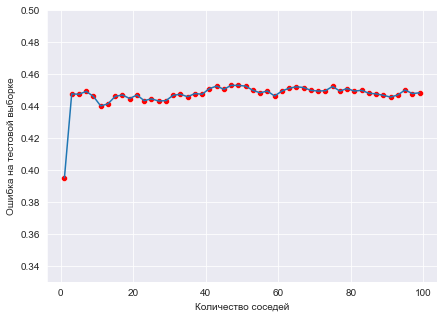

In [38]:
results=[]
grid_search.cv_results_['params']
for elem in grid_search.cv_results_['params']:
    results.append(elem['n_neighbors'])
    
plt.figure(figsize=(7,5))
sns.lineplot(x=results,y=1-grid_search.cv_results_['mean_test_score'])
sns.scatterplot(x=results,y=1-grid_search.cv_results_['mean_test_score'],color='r')
plt.xlabel("Количество соседей")
plt.ylabel("Ошибка на тестовой выборке")
plt.ylim([0.33,0.5])
pass

Из графика видно, что для любых значений больше одного происходит резкий скачок в качестве модели(в худшую сторону) и с последующим увеличением количества соседей, результаты уходят на плато.

Посмотри на матрицу рассогласования.

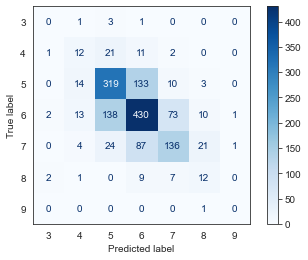

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style('white')
ConfusionMatrixDisplay.from_estimator(grid_search,X_test,y_test,cmap='Blues')
pass

Из матрицы становится ясно, что в основном классификатор путает соседние значения, например, вместо 6 говорит 5, а вместо 7 - 6.

По результатам можно сказать, что лучшее количество соседей - это один сосед, при увеличении количества соседей происходит переобучение. Классификатор чаще всего путает соседние значения. При этом финальный результат оставляет желать лучшего (`0.395`).

Будем собирать результаты всех классификаторов, чтобы потом всё сравнить на одном графике.

In [40]:
classifiers_results=[]
classifiers_results.append(["kNN",1-grid_search.best_score_])


## 8. Другие классификаторы

Попробуем несколько других классификаторов: `SVC`, `Decision Tree` и `Random Forest`.

## SVC

In [41]:
from sklearn.svm import SVC


svc = SVC(gamma='auto')
svc.fit(X_train,y_train)

train_err = np.mean(y_train!=svc.predict(X_train))
test_err = np.mean(y_test!=svc.predict(X_test))
print(f"Ошибка на тренировочной выборке: {train_err}; Ошибка на тестовой выборке: {test_err}")
classifiers_results.append(["SVC",test_err])

Ошибка на тренировочной выборке: 0.3989349900155314; Ошибка на тестовой выборке: 0.4324683965402528


Результат примерно такой же как и у kNN, даже хуже.

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier


decision_tree= DecisionTreeClassifier(random_state=58)
decision_tree.fit(X_train,y_train)

train_err = np.mean(y_train!=decision_tree.predict(X_train))
test_err = np.mean(y_test!=decision_tree.predict(X_test))
print(f"Ошибка на тренировочной выборке: {train_err}; Ошибка на тестовой выборке: {test_err}")
classifiers_results.append(["DecisionTree",test_err])

Ошибка на тренировочной выборке: 0.0; Ошибка на тестовой выборке: 0.41783100465735196


Хоть ошибка на тренировочной выборки и занулилась, что ожидаемо для дерева принятия решений, но вот для тестовой выборки результат без изменений.

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier


random_forest=RandomForestClassifier(n_estimators=128)
random_forest.fit(X_train,y_train)

train_err = np.mean(y_train!=random_forest.predict(X_train))
test_err = np.mean(y_test!=random_forest.predict(X_test))
print(f"Ошибка на тренировочной выборке: {train_err}; Ошибка на тестовой выборке: {test_err}")
classifiers_results.append(["RandomForest",test_err])

Ошибка на тренировочной выборке: 0.0; Ошибка на тестовой выборке: 0.3366600133067199


Random Forest удалось значительно улучшить результат (на `18%`), по сравнению с kNN. Однако, результать по прежнему оставляет желать лучшего(`0.336`).

Посмотрим на результаты всех классификаторов.

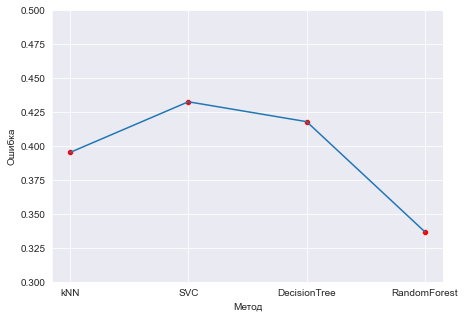

In [44]:
classifiers_names=[]
classifiers_err=[]
for elem in classifiers_results:
    classifiers_names.append(elem[0])
    classifiers_err.append(elem[1])
    
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.scatterplot(x=classifiers_names,y=classifiers_err,color='red')
sns.lineplot(x=classifiers_names,y=classifiers_err)
plt.ylim([0.30,0.5])
plt.xlabel("Метод")
plt.ylabel("Ошибка")
pass

- По результатам экспериментов можно сделать вывод, что, хоть датасет на первый взгляд и не предствляет из себя чего-то сложного, созданные модели машинного обучения показывают не самые хорошие результаты. Скорее всего, это связано с большим количество классов и их несбалансированностью. Из-за того, что их 10 штук, ошибка предсказания на 1 больше или меньше сильно влияет на расчёт финального значения ошибки.

- Среди протестированных классификаторов лучшим оказался `Random Forest`(`0.336`) с количеством деревьев `128`. За ним распологается `kNN` с `1` соседом(`0.395`). 

## 9. PCA

Попробуем улучшить результат. Для этого воспользуемся методом `PCA` и применим лучший на данный момент классификатор `Random Forest`:

In [45]:
from sklearn.decomposition import PCA

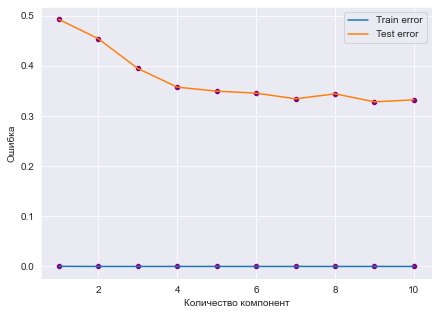

In [46]:
components = range(1, 11, 1)
error_train,error_test = [],[]
x_pca,y_pca=X.copy(),y.copy()

for cur_comp in components:
    pca = PCA(n_components = cur_comp)
    pca_fitted = pca.fit_transform(x_pca)
    X_train, X_test, y_train, y_test = train_test_split(pca_fitted, y_pca, test_size = 0.25, random_state = 58)
    
    random_forest=RandomForestClassifier(n_estimators=128)
    random_forest.fit(X_train, y_train)

    error_train.append(np.mean(y_train!=random_forest.predict(X_train)))
    error_test.append(np.mean(y_test!=random_forest.predict(X_test)))

plt.figure(figsize=(7,5))
sns.scatterplot(x=components,y=error_train,color='purple')
sns.lineplot(x=components,y=error_train,label = 'Train error')

sns.scatterplot(x=components,y=error_test,color='purple')
sns.lineplot(x=components,y=error_test,label = 'Test error')

plt.xlabel("Количество компонент")
plt.ylabel("Ошибка")

pass

In [47]:
best_components_num = components[error_test.index(min(error_test))]
print("Ошибка на тестовой выборке: ", min(error_test))
print("Оптимальное количество компонент: ", best_components_num)

Ошибка на тестовой выборке:  0.32801064537591484
Оптимальное количество компонент:  9


In [48]:
pca = PCA(n_components = best_components_num)
pcaFit = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pcaFit, y, test_size = 0.25, random_state = 58)
    
random_forest=RandomForestClassifier(n_estimators=128)
random_forest.fit(X_train, y_train)

train_err = np.mean(y_train!=random_forest.predict(X_train))
test_err = np.mean(y_test!=random_forest.predict(X_test))
print(f"Ошибка на тренировочной выборке: {train_err};\nОшибка на тестовой выборке: {test_err}")
classifiers_results.append(["PCA",test_err])

Ошибка на тренировочной выборке: 0.0;
Ошибка на тестовой выборке: 0.3313373253493014


По показаниям ошибки видно, что PCA не сильно помог и результат в общем-то не изменился.